# Data analysis 1

Useful `LINKS`:

&#128187; 1. [MovieLens 20M Dataset Research Paper](http://files.grouplens.org/papers/harper-tiis2015.pdf)

&#128187; 2. [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

&#128187; 3. [Pandas Official Site](https://pandas.pydata.org)

# &#128203; Introduction of MoveLens:
This is a report on the movieLens dataset available here. MovieLens itself is a research site run by GroupLens Research group at the University of Minnesota. The first automated recommender system was developed there in 1993.

# &#128221; Dataset Description:
The dataset is available in several snapshots. The ones that were used in this analysis were Latest Datasets - both full and small (for web scraping). They were last updated in October 2016.



# Overview of Pandas:
Pandas is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python.

* The main data structures pandas provides are Series and DataFrames.

Here are the links to the data source and location:
 
* ** Data Source:** Kaggle Data Science Home (filename: movelens-20m-dataset.zip)
* **Location:** https://www.kaggle.com/grouplens/movielens-20m-dataset

In [1]:
import pandas as pd

# &#128197; Read the Dataset
In this notebook, we will be using three CSV files:

* **ratings.csv :** userId,movieId,rating, timestamp

* **tags.csv : **userId,movieId, tag, timestamp

* **movies.csv : **movieId, title, genres 

In [2]:
movies = pd.read_csv('../input/movielens-20m-dataset/movie.csv', sep=',')
print(type(movies))
movies.head(20)

<class 'pandas.core.frame.DataFrame'>


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
tags = pd.read_csv('../input/movielens-20m-dataset/tag.csv', sep=',')
tags.head(20)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
5,65,668,bollywood,2013-05-10 01:37:56
6,65,898,screwball comedy,2013-05-10 01:42:40
7,65,1248,noir thriller,2013-05-10 01:39:43
8,65,1391,mars,2013-05-10 01:40:55
9,65,1617,neo-noir,2013-05-10 01:43:37


In [5]:
ratings = pd.read_csv('../input/movielens-20m-dataset/rating.csv', sep=',', parse_dates=['timestamp'])
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
5,1,112,3.5,2004-09-10 03:09:00
6,1,151,4.0,2004-09-10 03:08:54
7,1,223,4.0,2005-04-02 23:46:13
8,1,253,4.0,2005-04-02 23:35:40
9,1,260,4.0,2005-04-02 23:33:46


* For current analysis, we will remove timestamp

In [6]:
del ratings['timestamp']
del tags['timestamp']

In [7]:
ratings.head(20)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


# &#128230; Data Structures:

## &#128678; Series

In [8]:
row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [9]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


In [10]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [12]:
row_0['userId']

18

In [14]:
'rating' in row_0

False

In [15]:
row_0.name

0

In [16]:
row_0 = row_0.rename('firstRow')
row_0.name

'firstRow'

# &#9641; DataFrames

In [17]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [18]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [19]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

In [20]:
tags.iloc[ [0,11,500] ]

,userId,movieId,tag
0,18,4141,Mark Waters
11,65,1783,noir thriller
500,342,55908,entirely dialogue


# &#128200; &#128201; Descriptive Statistics 
Let's look how the ratings are distributed!

In [21]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [22]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [23]:
ratings.describe()

,userId,movieId,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


In [20]:
ratings['rating'].mean()

3.5255285642993797

In [21]:
ratings.mean()

userId     69045.872583
movieId     9041.567330
rating         3.525529
dtype: float64

In [24]:
ratings['rating'].min()

0.5

In [25]:
ratings['rating'].max()

5.0

In [26]:
ratings['rating'].std()

1.0519889192942424

In [27]:
ratings['rating'].mode()

0    4.0
dtype: float64

In [26]:
ratings.corr()

,userId,movieId,rating
userId,1.000000,-0.000850,0.001175
movieId,-0.000850,1.000000,0.002606
rating,0.001175,0.002606,1.000000


In [27]:
filter1 = ratings['rating'] > 10
print(filter1)
filter1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
20000258    False
20000259    False
20000260    False
20000261    False
20000262    False
Name: rating, Length: 20000263, dtype: bool


False

In [28]:
filter2 = ratings['rating'] > 0
filter2.all()

True

# &#128295; Data Cleaning: Handling Missing Data

In [29]:
movies.shape

(27278, 3)

In [28]:
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [29]:
movies.isnull().any().any()

False

* Thats nice ! No NULL values !

In [30]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [31]:
ratings.shape

(20000263, 3)

In [32]:
ratings.isnull().any().any()

False

* Thats nice ! No NULL values !

In [33]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [34]:
tags.shape

(465564, 3)

In [35]:
tags.isnull().any().any()

True

* We have some tags which are NULL.

In [36]:
tags=tags.dropna()

In [37]:
tags.isnull().any().any()

False

In [38]:
tags.shape

(465548, 3)

* Thats nice ! No NULL values ! Notice the number of lines have reduced.

# &#128202; Data Visualization

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

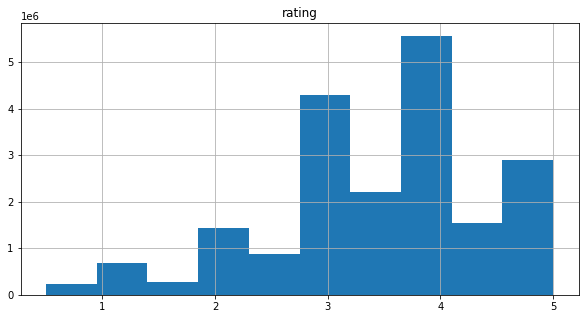

In [39]:
%matplotlib inline

ratings.hist(column='rating', figsize=(10,5))

<AxesSubplot:>

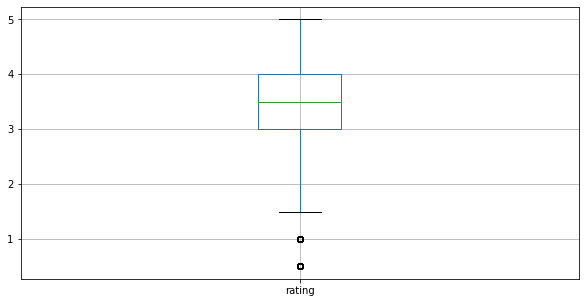

In [39]:
ratings.boxplot(column='rating', figsize=(10,5))

# &#128228; Slicing Out Columns

In [40]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [41]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [42]:
ratings[-10:]

,userId,movieId,rating
20000253,138493,60816,4.5
20000254,138493,61160,4.0
20000255,138493,65682,4.5
20000256,138493,66762,4.5
20000257,138493,68319,4.5
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0
20000262,138493,71619,2.5


In [43]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

Virginie Ledoyen          1
Scott Hamilton Kennedy    1
hagiography               1
and unwatchable           1
Bobo                      1
Ray Ban Clubmasters       1
Steve Harvey              1
Rawson Marshall Thuber    1
julie andrews             1
robbie gordon             1
Name: tag, dtype: int64

<AxesSubplot:>

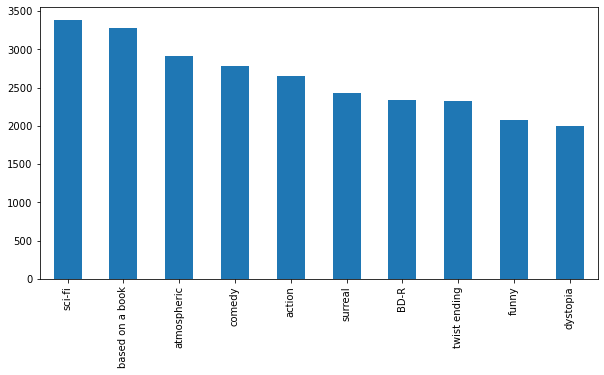

In [44]:
tag_counts[:10].plot(kind='bar', figsize=(10,5))

# &#127907; Filters for Selecting Rows

In [45]:
is_highly_rated = ratings['rating'] >= 5.0
ratings[is_highly_rated][30:50]

,userId,movieId,rating
239,3,50,5.0
242,3,175,5.0
244,3,223,5.0
245,3,260,5.0
246,3,316,5.0
247,3,318,5.0
248,3,329,5.0
252,3,457,5.0
253,3,480,5.0
254,3,490,5.0


In [46]:
is_action= movies['genres'].str.contains('Action')
movies[is_action][5:15]

,movieId,title,genres
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller
69,70,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
70,71,Fair Game (1995),Action
75,76,Screamers (1995),Action|Sci-Fi|Thriller
77,78,"Crossing Guard, The (1995)",Action|Crime|Drama|Thriller
85,86,White Squall (1996),Action|Adventure|Drama


In [47]:
movies[is_action].head(15)

,movieId,title,genres
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
14,15,Cutthroat Island (1995),Action|Adventure|Romance
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller
22,23,Assassins (1995),Action|Crime|Thriller
41,42,Dead Presidents (1995),Action|Crime|Drama
43,44,Mortal Kombat (1995),Action|Adventure|Fantasy
50,51,Guardian Angel (1994),Action|Drama|Thriller
65,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action|Sci-Fi|Thriller


# &#128101; Group By and Aggregate

In [48]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,239125
1.0,680732
1.5,279252
2.0,1430997
2.5,883398
3.0,4291193
3.5,2200156
4.0,5561926
4.5,1534824


In [49]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [50]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,49695
2,22243
3,12735
4,2756
5,12161


In [51]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

,rating
movieId,
131254,1
131256,1
131258,1
131260,1
131262,1


# &#128304; Merge Dataframes

In [52]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


In [53]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [54]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie


* More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

### &#128218; Combine aggreagation, merging, and filters to get useful analytics

In [55]:
avg_ratings= ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [56]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

,movieId,title,genres,rating
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26741,131258,The Pirates (2014),Adventure,2.5
26742,131260,Rentun Ruusu (2001),(no genres listed),3.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [57]:
is_highly_rated = box_office['rating'] >= 4.0
box_office[is_highly_rated][-5:]

,movieId,title,genres,rating
26737,131250,No More School (2000),Comedy,4.0
26738,131252,Forklift Driver Klaus: The First Day on the Jo...,Comedy|Horror,4.0
26739,131254,Kein Bund für's Leben (2007),Comedy,4.0
26740,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


In [58]:
is_Adventure = box_office['genres'].str.contains('Adventure')
box_office[is_Adventure][:5]

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
7,8,Tom and Huck (1995),Adventure|Children,3.142049
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.430029
12,13,Balto (1995),Adventure|Animation|Children,3.272416


In [59]:
box_office[is_Adventure & is_highly_rated][-5:]

,movieId,title,genres,rating
26611,130586,Itinerary of a Spoiled Child (1988),Adventure|Drama,4.5
26655,130996,The Beautiful Story (1992),Adventure|Drama|Fantasy,5.0
26667,131050,Stargate SG-1 Children of the Gods - Final Cut...,Adventure|Sci-Fi|Thriller,5.0
26736,131248,Brother Bear 2 (2006),Adventure|Animation|Children|Comedy|Fantasy,4.0
26743,131262,Innocence (2014),Adventure|Fantasy|Horror,4.0


# &#128221; Vectorized String Operations

In [60]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## &#128300; Split 'genres' into multiple columns 

In [61]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [62]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None
5,Action,Crime,Thriller,None,None,None,None,None,None,None
6,Comedy,Romance,None,None,None,None,None,None,None,None
7,Adventure,Children,None,None,None,None,None,None,None,None
8,Action,None,None,None,None,None,None,None,None,None
9,Action,Adventure,Thriller,None,None,None,None,None,None,None


## &#128681; Add a new column for comedy genre flag 

In [63]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [64]:
movie_genres[:10]

,0,1,2,3,4,5,6,7,8,9,isComedy
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None,True
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None,False
2,Comedy,Romance,None,None,None,None,None,None,None,None,True
3,Comedy,Drama,Romance,None,None,None,None,None,None,None,True
4,Comedy,None,None,None,None,None,None,None,None,None,True
5,Action,Crime,Thriller,None,None,None,None,None,None,None,False
6,Comedy,Romance,None,None,None,None,None,None,None,None,True
7,Adventure,Children,None,None,None,None,None,None,None,None,False
8,Action,None,None,None,None,None,None,None,None,None,False
9,Action,Adventure,Thriller,None,None,None,None,None,None,None,False


## &#128223; Extract year from title e.g. (2007) 

In [65]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [66]:
movies.tail()

,movieId,title,genres,year
27273,131254,Kein Bund für's Leben (2007),Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,2002
27275,131258,The Pirates (2014),Adventure,2014
27276,131260,Rentun Ruusu (2001),(no genres listed),2001
27277,131262,Innocence (2014),Adventure|Fantasy|Horror,2014


More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods 

# &#128336; Parsing Timestamps

 * Timestamps are common in sensor data or other time series datasets. Let us revisit the tags.csv dataset and read the timestamps!

In [69]:
tags = pd.read_csv('../input/movielens-20m-dataset/tag.csv', sep=',')

In [70]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

Unix time / POSIX time / epoch time records time in seconds 

since midnight Coordinated Universal Time (UTC) of April 4, 2009

In [71]:
tags.head(5)

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [73]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'])

* Data Type datetime64[ns] maps to either

In [74]:
tags['parsed_time'].dtype

dtype('<M8[ns]')

In [75]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18,2013-05-10 01:41:18


Selecting rows based on timestamps

In [76]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

((465564, 5), (12130, 5))

Sorting the table using the timestamps

In [77]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

,userId,movieId,tag,timestamp,parsed_time
333932,100371,2788,monty python,2005-12-24 13:00:10,2005-12-24 13:00:10
333927,100371,1732,coen brothers,2005-12-24 13:00:36,2005-12-24 13:00:36
333924,100371,1206,stanley kubrick,2005-12-24 13:00:48,2005-12-24 13:00:48
333923,100371,1193,jack nicholson,2005-12-24 13:02:51,2005-12-24 13:02:51
333939,100371,5004,peter sellers,2005-12-24 13:03:19,2005-12-24 13:03:19
333922,100371,47,morgan freeman,2005-12-24 13:03:32,2005-12-24 13:03:32
333921,100371,47,brad pitt,2005-12-24 13:03:32,2005-12-24 13:03:32
333936,100371,4011,brad pitt,2005-12-24 13:03:51,2005-12-24 13:03:51
333937,100371,4011,guy ritchie,2005-12-24 13:03:51,2005-12-24 13:03:51
333920,100371,32,bruce willis,2005-12-24 13:04:02,2005-12-24 13:04:02


# &#128199; Average Movie Ratings over Time

## Movie ratings related to the year of launch?

In [78]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

,movieId,rating
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0
26743,131262,4.0


In [79]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

,movieId,rating
movieId,1.000000,-0.090369
rating,-0.090369,1.000000
